<a href="https://colab.research.google.com/github/ChandanCharchit/Computer_Vision_Project/blob/main/Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt


Notes for running this file

1.   Please install and import all the libraries
2.   make 3 directories(LandCover, Tree, NonTree) where all the photos will be saved.
3.   I have made 3 directories, you may have to drag the images into respective directories after unzipping is done(this is in code).
4.   If you want to run this in colab then you have to link your google drive to colab(below code will prompt you to do that).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir LC_250m


In [4]:
!mkdir Tree_Cover

In [88]:
!mkdir NonTree_Vegetation

mkdir: cannot create directory ‘NonTree_Vegetation’: File exists


In [ ]:
!unzip '/content/drive/MyDrive/Datasets/LC_250m.zip'

In [ ]:
!pip install rasterio

In [7]:
import rasterio as rio

In [8]:
mv Land_Cover_IGBP_2014_GT_250_Alberta.tif LC_250m

In [9]:
mv Land_Cover_IGBP_2015_GT_250_Alberta.tif LC_250m/

In [10]:
mv Land_Cover_IGBP_2016_GT_250_Alberta.tif LC_250m/

In [11]:
mv Land_Cover_IGBP_2017_GT_250_Alberta.tif LC_250m/

In [12]:
mv Land_Cover_IGBP_2018_GT_250_Alberta.tif LC_250m/

In [13]:
mv Land_Cover_IGBP_2019_GT_250_Alberta.tif LC_250m/

In [14]:
mv Land_Cover_IGBP_2020_GT_250_Alberta.tif LC_250m/

In [15]:
from rasterio.plot import show

In [16]:
img = rio.open('/content/LC_250m/Land_Cover_IGBP_2014_GT_250_Alberta.tif')

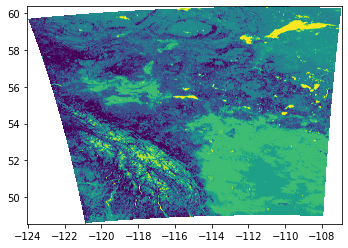

In [17]:
show(img)

In [18]:
full_img = img.read()

In [19]:
full_img

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [20]:
num_bands = img.count
num_bands

1

In [21]:
img_band_1 = img.read(1)

In [22]:
full_img.shape

(1, 5680, 8220)

In [23]:
print(img.crs)

EPSG:4326


In [24]:
metadata = img.meta
metadata

{'count': 1,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 5680,
 'nodata': 255.0,
 'transform': Affine(0.0020833333332116784, 0.0, -124.049999989,
       0.0, -0.002083333333274649, 60.374999995),
 'width': 8220}

In [25]:
'''To find out geo transform'''
img.transform

Affine(0.0020833333332116784, 0.0, -124.049999989,
       0.0, -0.002083333333274649, 60.374999995)

In [26]:
!sudo easy_install GDAL

Searching for GDAL
Best match: GDAL 2.2.2
Adding GDAL 2.2.2 to easy-install.pth file

Using /usr/lib/python2.7/dist-packages
Processing dependencies for GDAL
Finished processing dependencies for GDAL


In [27]:
from osgeo import gdal

In [28]:
import numpy as np

In [29]:
file1path = '/content/LC_250m/Land_Cover_IGBP_2014_GT_250_Alberta.tif'

In [30]:
ds = gdal.Open(file1path)

In [31]:
gt = ds.GetGeoTransform()

In [32]:
gt

(-124.049999989,
 0.0020833333332116784,
 0.0,
 60.374999995,
 0.0,
 -0.002083333333274649)

In [40]:
!gdalinfo -nomd /content/LC_250m/Land_Cover_IGBP_2014_GT_250_Alberta.tif

Driver: GTiff/GeoTIFF
Files: /content/LC_250m/Land_Cover_IGBP_2014_GT_250_Alberta.tif
Size is 8220, 5680
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-124.049999989000000,60.374999995000003)
Pixel Size = (0.002083333333212,-0.002083333333275)
Corner Coordinates:
Upper Left  (-124.0500000,  60.3750000) (124d 3' 0.00"W, 60d22'30.00"N)
Lower Left  (-124.0500000,  48.5416667) (124d 3' 0.00"W, 48d32'30.00"N)
Upper Right (-106.9250000,  60.3750000) (106d55'30.00"W, 60d22'30.00"N)
Lower Right (-106.9250000,  48.5416667) (106d55'30.00"W, 48d32'30.00"N)
Center      (-115.4875000,  54.4583333) (115d29'15.00"W, 54d27'30.00"N)
Band 1 Block=8220x1 Type=Byte, ColorInterp=Gray
  NoData Value=255


In [44]:
img.bounds

BoundingBox(left=-124.049999989, bottom=48.541666662, right=-106.92499999, top=60.374999995)

In [50]:
!unzip '/content/drive/MyDrive/Datasets/Tree_Cover.zip'

Archive:  /content/drive/MyDrive/Datasets/Tree_Cover.zip
mapname:  conversion of  failed
 extracting: Percent_Tree_Cover_2014.tif  
 extracting: Percent_Tree_Cover_2015.tif  
 extracting: Percent_Tree_Cover_2016.tif  
 extracting: Percent_Tree_Cover_2017.tif  
 extracting: Percent_Tree_Cover_2018.tif  
 extracting: Percent_Tree_Cover_2019.tif  
 extracting: Percent_Tree_Cover_2020.tif  


In [51]:
file2path = '/content/Percent_Tree_Cover_2014.tif'

In [52]:
ds2 = gdal.Open(file2path)

In [53]:
gt2 = ds2.GetGeoTransform()

In [54]:
gt2

(-124.0520833222201,
 0.0020833333331466974,
 0.0,
 60.37708332792444,
 0.0,
 -0.0020833333331466974)

In [55]:
!gdalinfo -nomd /content/Percent_Tree_Cover_2014.tif

Driver: GTiff/GeoTIFF
Files: /content/Percent_Tree_Cover_2014.tif
Size is 8221, 5682
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-124.052083322220099,60.377083327924439)
Pixel Size = (0.002083333333147,-0.002083333333147)
Corner Coordinates:
Upper Left  (-124.0520833,  60.3770833) (124d 3' 7.50"W, 60d22'37.50"N)
Lower Left  (-124.0520833,  48.5395833) (124d 3' 7.50"W, 48d32'22.50"N)
Upper Right (-106.9250000,  60.3770833) (106d55'30.00"W, 60d22'37.50"N)
Lower Right (-106.9250000,  48.5395833) (106d55'30.00"W, 48d32'22.50"N)
Center      (-115.4885417,  54.4583333) (115d29'18.75"W, 54d27'30.00"N)
Band 1 Block=8221x1 Type=Byte, ColorInterp=Gray
  NoData Value=253


In [56]:
band2 = ds.GetRasterBand(1)

### Actual Code starts from here

The below 4  code cells have code for 4 tables in the excel file.
while only 2 of these are in use. Please keep it incase you need it in future

In [63]:
import math

def fraction_burned(tree_coverage):
  if tree_coverage < 0.4:
    fr_tree_burned = 0
    fr_veg_burned = 0.98
  elif tree_coverage >= 0.6:
    fr_tree_burned = 0.3
    fr_veg_burned = 0.9
  else:
    fr_tree_burned = 0.3
    fr_veg_burned = math.exp(tree_coverage*(-0.13))
  return {'fr_tree_burned': fr_tree_burned, 'fr_veg_burned': fr_veg_burned}

In [64]:
def burned(tree_coverage, veg_coverage, fr_tree_burned, fr_veg_burned):
  tree_burned = fr_tree_burned * tree_coverage
  veg_burned = fr_veg_burned * veg_coverage
  return {'tree_burned': tree_burned, 'veg_burned': veg_burned}

In [65]:
def Biomass_EmFactor(land_cover_class):

  if land_cover_class == 1:
    co2_emission_factor = 1514
    co_emission_factor = 118
    ch4_emission_factor = 6
    biomass_loading = 25000

  if land_cover_class == 2:
    co2_emission_factor = 1643
    co_emission_factor = 92
    ch4_emission_factor = 5.1
    biomass_loading = 28076

  if land_cover_class == 3:
    co2_emission_factor = 1514
    co_emission_factor = 118
    ch4_emission_factor = 6
    biomass_loading = 25000

  if land_cover_class == 4:
    co2_emission_factor = 1630
    co_emission_factor = 102
    ch4_emission_factor = 5
    biomass_loading = 25000

  if land_cover_class == 5:
    co2_emission_factor = 1630
    co_emission_factor = 102
    ch4_emission_factor = 56
    biomass_loading = 25000

  if land_cover_class == 6:
    co2_emission_factor = 1716
    co_emission_factor = 68
    ch4_emission_factor = 2.6
    biomass_loading = 5705

  if land_cover_class == 7:
    co2_emission_factor = 1716
    co_emission_factor = 68
    ch4_emission_factor = 2.6
    biomass_loading = 5705

  if land_cover_class == 8:
    co2_emission_factor = 1716
    co_emission_factor = 68
    ch4_emission_factor = 2.6
    biomass_loading = 5705

  if land_cover_class == 9:
    co2_emission_factor = 1692
    co_emission_factor = 59
    ch4_emission_factor = 1.5
    biomass_loading = 976

  if land_cover_class == 10:
    co2_emission_factor = 1692
    co_emission_factor = 59
    ch4_emission_factor = 1.5
    biomass_loading = 976

  if land_cover_class == 11:
    co2_emission_factor = 1692
    co_emission_factor = 59
    ch4_emission_factor = 1.5
    biomass_loading = 976

  if land_cover_class == 12:
    co2_emission_factor = 1537
    co_emission_factor = 111
    ch4_emission_factor = 6
    biomass_loading = 800

  if land_cover_class == 14:
    co2_emission_factor = 1692
    co_emission_factor = 59
    ch4_emission_factor = 1.5
    biomass_loading = 976

  if land_cover_class == 16:
    co2_emission_factor = 1692
    co_emission_factor = 59
    ch4_emission_factor = 1.5
    biomass_loading = 976

  return {'co2_emission_factor': co2_emission_factor, 
          'co_emission_factor': co2_emission_factor, 
          'ch4_emission_factor': ch4_emission_factor,
          'biomass_loading': biomass_loading
          }

In [66]:
def get_final_emissions(em_factor, burned):
  estimated_co2_emissions = 62500 * em_factor.biomass_loading * em_factor.co2_emission_factor *(burned.tree_burned + burned.veg_burned)
  estimated_co_emissions = 62500 * em_factor.biomass_loading * em_factor.co_emission_factor *(burned.tree_burned + burned.veg_burned)
  estimated_ch4_emissions = 62500 * em_factor.biomass_loading * em_factor.ch4_emission_factor *(burned.tree_burned + burned.veg_burned)
  return [estimated_co2_emissions, estimated_co_emissions, estimated_ch4_emissions]

In [67]:
img.bounds.left, img.bounds.right

(-124.049999989, -106.92499999)

In [81]:
img.bounds.top, img.bounds.bottom

(60.374999995, 48.541666662)

In [ ]:
!unzip '/content/drive/MyDrive/Datasets/NonTree_Vegetation.zip'

In [82]:
img3 = rio.open('/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2014.tif')
img3_band = img3.read(1)
x, y = (img.bounds.left+10, img.bounds.top-5)
row, col = img.index(x, y)
img3_band[row, col]/100

0.4

In [83]:
import pandas as pd

Below code is for iterating through each of the pixels in any image and getting the raster data out of it.

*0.002083333333147* is the pixel length in each image.

In [94]:
def get_Dataset(file_location, df):
  df1=df
  with rio.open(file_location) as dataset:
    coordinates = ((dataset.bounds.left, dataset.bounds.top),
                  (dataset.bounds.right, dataset.bounds.bottom))
    img_band = dataset.read(1)
    lon = coordinates[0][0]
    lat = coordinates[0][1]

    while (lat > coordinates[1][1]) and (lat<=coordinates[0][1]):
      lon = coordinates[0][0]
      while (lon < coordinates[1][0]) and (lon >= coordinates[0][0]):
        px, py = dataset.index(lon, lat)
        if df1.columns[2] == 'Land Cover':
          df1 = df1.append({'Longitude' : lon, 
                          'Latitude' : lat, 
                          'Land Cover' : img_band[px, py]}, ignore_index = True)
        elif df1.columns[2] == 'Tree Coverage':
          df1 = df1.append({'Longitude' : lon, 
                          'Latitude' : lat, 
                          'Tree Coverage' : img_band[px, py]/100}, ignore_index = True)
        elif df1.columns[2] == 'Vegetation Coverage':
          df1 = df1.append({'Longitude' : lon, 
                          'Latitude' : lat, 
                          'Vegetation Coverage' : img_band[px, py]/100}, ignore_index = True)

        lon+=0.002083333333147
      lat-=0.002083333333147

  return df1

Archive:  /content/drive/MyDrive/Datasets/NonTree_Vegetation.zip
mapname:  conversion of  failed
 extracting: Percent_NonTree_Vegetation_2014.tif  
 extracting: Percent_NonTree_Vegetation_2015.tif  
 extracting: Percent_NonTree_Vegetation_2016.tif  
 extracting: Percent_NonTree_Vegetation_2017.tif  
 extracting: Percent_NonTree_Vegetation_2018.tif  
 extracting: Percent_NonTree_Vegetation_2019.tif  
 extracting: Percent_NonTree_Vegetation_2020.tif  


This code cell contains locations of images for each year. Later you will be asked to input any year. and it will automatically pick yearly images.

In [89]:
def get_file_location(year):
  lc_location = None
  Tree_location = None
  NonTree_location = None
  if year == '2014':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2014_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2014.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2014.tif'
  if year == '2015':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2015_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2015.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2015.tif'
  if year == '2016':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2016_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2016.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2016.tif'
  if year == '2017':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2017_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2017.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2017.tif'
  if year == '2018':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2018_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2018.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2018.tif'
  if year == '2019':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2019_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2019.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2019.tif'
  if year == '2020':
    lc_location = '/content/LC_250m/Land_Cover_IGBP_2020_GT_250_Alberta.tif'
    Tree_location = '/content/Tree_Cover/Percent_Tree_Cover_2020.tif'
    NonTree_location = '/content/NonTree_Vegetation/Percent_NonTree_Vegetation_2020.tif'
  
  return {'LandCover_location': lc_location,
          'Tree_location': Tree_location,
          'NonTree_location': NonTree_location}


### Table structure of 3 different dataframes.

In [90]:
land_column_names = ['Longitude', 'Latitude', 'Land Cover']
land_cover_data  = pd.DataFrame(columns = column_names)

Tree_column_names = ['Longitude', 'Latitude', 'Tree Coverage']
Tree_cover_data  = pd.DataFrame(columns = Tree_column_names)

NonTree_column_names = ['Longitude', 'Latitude', 'Vegetation Coverage']
NonTree_cover_data  = pd.DataFrame(columns = NonTree_column_names)


### Input the year for which you want the csv files.

In [92]:
year = input('Please enter the year: ')

file_location = get_file_location(year)

Please enter the year: 2015


This code cell will call getDataset function and iterate through pixels.
This may take hours to finish.

In [ ]:
LandCover_Dataset = get_Dataset(file_location['LandCover_location'], land_cover_data)
TreeCover_Dataset = get_Dataset(file_location['Tree_location'], Tree_cover_data)
NonTreeCover_Dataset = get_Dataset(file_location['NonTree_location'], NonTree_cover_data)

Concatenating the above datasets side by side.

In [ ]:
result_df = pd.concat([LandCover_Dataset, TreeCover_Dataset['Tree Coverage'], NonTreeCover_Dataset['Vegetation Coverage']], axis=1)

In [ ]:
# for loop for picking out each row and feed them to diff functions
# for index, row in result_df.iterrows():
  # burned_fraction = fraction_burned(row['Tree Coverage'])
  # burned_cover = burned(row['Tree Coverage'], row['Vegetation Coverage'], burned_fraction['fr_tree_burned'], burned_fraction['fr_veg_burned'])
  # biomass_emissn = Biomass_EmFactor(row['Land Cover'])
  # final_emission = get_final_emissions(biomass_emissn, burned_cover)


In [ ]:
# calculate_final_emission(result_df)

In [ ]:
# def calculate_final_emission(result_df):
#   burned_fraction = fraction_burned(result_df['Tree Coverage'])
#   burned_cover = burned(result_df['Tree Coverage'], result_df['Vegetation Coverage'], burned_fraction['fr_tree_burned'], burned_fraction['fr_veg_burned'])
#   biomass_emissn = Biomass_EmFactor(result_df['Land Cover'])
#   final_emission = get_final_emissions(biomass_emissn, burned_cover)
#   return final_emission

In [ ]:
result_df['burned_fr_tree'] = result_df['Tree Coverage'].apply(lambda x: fraction_burned(x)['fr_tree_burned'])
result_df['burned_fr_veg'] = result_df['Tree Coverage'].apply(lambda x: fraction_burned(x)['fr_veg_burned'])

In [ ]:
result_df['burned_cover_tree'] = result_df['Tree Coverage'] * result_df['burned_fr_tree']
result_df['burned_cover_veg'] = result_df['Vegetation Coverage'] * result_df['burned_fr_veg']

In [ ]:
result_df['co2_emission_factor'] = result_df['Land Cover'].apply(lambda x: Biomass_EmFactor(x)['co2_emission_factor'])
result_df['co_emission_factor'] = result_df['Land Cover'].apply(lambda x: Biomass_EmFactor(x)['co_emission_factor'])
result_df['ch4_emission_factor'] = result_df['Land Cover'].apply(lambda x: Biomass_EmFactor(x)['ch4_emission_factor'])
result_df['biomass_loading'] = result_df['Land Cover'].apply(lambda x: Biomass_EmFactor(x)['biomass_loading'])

In [ ]:
result_df['estimated_co2_emissions'] = 62500 * result_df['biomass_loading'] * result_df['co2_emission_factor'] * (result_df['burned_cover_tree'] + result_df['burned_cover_veg'])
result_df['estimated_co_emissions'] = 62500 * result_df['biomass_loading'] * result_df['co_emission_factor'] * (result_df['burned_cover_tree'] + result_df['burned_cover_veg'])
result_df['estimated_ch4_emissions'] = 62500 * result_df['biomass_loading'] * result_df['ch4_emission_factor'] * (result_df['burned_cover_tree'] + result_df['burned_cover_veg'])

`Result_df is the final csv file. there are 8 extra columns in between longitude, latitude and 3 estimated emission columns.`

---



#### The below cell will save the result df to a csv file.

In [ ]:
result_df.to_csv('emissions.csv', index=False)